#### Problem statement:-
The goal of this project is to develop machine learning models to predict fraudulent credit card transactions. This is critical for both banks and their customers, as banks cannot afford to allow fraudsters to steal customer funds. Each fraudulent transaction represents a loss for the bank, as they are held accountable for such activities.

The dataset consists of transactions carried out by European credit cardholders over a two-day period in September 2013. It is highly imbalanced, with fraudulent transactions making up only 0.172% of the total. Addressing this imbalance will be essential in building an effective model, and we will experiment with various algorithms to identify the best-performing approach.

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy import stats

In [5]:
pd.set_option('display.max_columns', 500)

In [6]:
# Loading and reading the dataset
df= pd.read_csv('creditcard.csv.zip')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [7]:
# Display column names in the dataset
column_names = df.columns
print(column_names)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [8]:
# Display basic information about the dataset
print("Initial dataset info:")
df.info()

Initial dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  f

# Data Cleaning Techniques

##### Check for missing values in the dataset 

In [11]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Since the creditcard.csv dataset doesn't contain missing data, the below codes introduces missing values randomly into the dataset for experimentation purposes and then saves the modified (unclean) dataset to a CSV file.

In [13]:
# Set a random seed for reproducibility
np.random.seed(42)

In [14]:
# Function to introduce missing values
def introduce_missingness(df, missing_percentage=0.05):
    df_with_missing = df.copy()
    
    for col in df_with_missing.columns:
        # Introduce missing values randomly in each column
        missing_indices = df_with_missing.sample(frac=missing_percentage).index
        df_with_missing.loc[missing_indices, col] = np.nan
    
    return df_with_missing

# Introduce missing values into 5% of the dataset
df_unclean = introduce_missingness(df, missing_percentage=0.05) # Changed to df_unclean

# Save the unclean dataset for further experimentation
df_unclean.to_csv('unclean_creditcard.csv', index=False)

In [15]:
# Show the number of missing values per column
print("Missing values introduced in each column:")
print(df_unclean.isnull().sum())

Missing values introduced in each column:
Time      14240
V1        14240
V2        14240
V3        14240
V4        14240
V5        14240
V6        14240
V7        14240
V8        14240
V9        14240
V10       14240
V11       14240
V12       14240
V13       14240
V14       14240
V15       14240
V16       14240
V17       14240
V18       14240
V19       14240
V20       14240
V21       14240
V22       14240
V23       14240
V24       14240
V25       14240
V26       14240
V27       14240
V28       14240
Amount    14240
Class     14240
dtype: int64


##### DELETION (removing rows with missing data)

In [17]:
df_deleted_rows = df.dropna()
print(df_deleted_rows)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9       V10       V11       V12  \
0       0.462388  0.239599  0.098698  0.363787  0.09079

##### OUTLIERS (Removing outliers using Z-Score method)

In [19]:
# Compute Z-scores for numeric columns
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))

# Set the Z-score threshold
threshold = 3

# Filter out rows where any Z-score exceeds the threshold (removing outliers)
df_no_outliers = df[(z_scores < threshold).all(axis=1)]

In [20]:
# Display the first few rows of the dataset without outliers
print(df_no_outliers.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   
5  0.260314 -0.568671 -0.371407  1.341262  0.359894 -0.358091 -0.137134   

        V15       V16       V17       V18       V19       V20 

In [21]:
# Print the shape of the original dataframe and the dataframe without outliers
print(f"Original dataframe shape: {df.shape}")
print(f"Dataframe without outliers shape: {df_no_outliers.shape}")

Original dataframe shape: (284807, 31)
Dataframe without outliers shape: (246943, 31)


In [22]:
import pandas as pd

# Load the dataset into a DataFrame
df_with_missing = pd.read_csv('unclean_creditcard.csv')

# Checking for null values in each column
null_values = df_with_missing.isnull().sum()

# Print the count of null values in each column
print("Null values introduced in each column:")
print(null_values)


Null values introduced in each column:
Time      14240
V1        14240
V2        14240
V3        14240
V4        14240
V5        14240
V6        14240
V7        14240
V8        14240
V9        14240
V10       14240
V11       14240
V12       14240
V13       14240
V14       14240
V15       14240
V16       14240
V17       14240
V18       14240
V19       14240
V20       14240
V21       14240
V22       14240
V23       14240
V24       14240
V25       14240
V26       14240
V27       14240
V28       14240
Amount    14240
Class     14240
dtype: int64


In [23]:
# MISSING DATA (Checking for missing data)
missing_data = df.isnull().sum()
print("\nMissing Data Summary:")
print(missing_data)


Missing Data Summary:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


##### DATA CLEANING: Removing rows where 'Amount' column is greater than a threshold (e.g., 10,000)

In [25]:
df_cleaned = df[df['Amount'] <= 10000]

In [26]:
# Output the cleaned data summary
print("\nData after cleaning:")
df_cleaned.info()


Data after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 284800 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284800 non-null  float64
 1   V1      284800 non-null  float64
 2   V2      284800 non-null  float64
 3   V3      284800 non-null  float64
 4   V4      284800 non-null  float64
 5   V5      284800 non-null  float64
 6   V6      284800 non-null  float64
 7   V7      284800 non-null  float64
 8   V8      284800 non-null  float64
 9   V9      284800 non-null  float64
 10  V10     284800 non-null  float64
 11  V11     284800 non-null  float64
 12  V12     284800 non-null  float64
 13  V13     284800 non-null  float64
 14  V14     284800 non-null  float64
 15  V15     284800 non-null  float64
 16  V16     284800 non-null  float64
 17  V17     284800 non-null  float64
 18  V18     284800 non-null  float64
 19  V19     284800 non-null  float64
 20  V20     284800 non-null  float6

###### Checking the distribution of the classes

In [28]:
classes = df['Class'].value_counts()
classes

Class
0    284315
1       492
Name: count, dtype: int64

In [29]:
normal_share = round((classes[0]/df['Class'].count()*100),2)
normal_share

99.83

In [30]:
fraud_share = round((classes[1]/df['Class'].count()*100),2)
fraud_share

0.17

Upon inspecting the class distribution, it was found that:
•	99.83% of the transactions are non-fraudulent.
•	0.17% of the transactions are fraudulent.
This severe imbalance is common in fraud detection datasets. This imbalance suggests that specialized techniques may be needed for modeling, such as resampling or cost-sensitive learning to handle this skewness in the target variable.

# Data Transformation and Normalization

#### Standardization (Z-score Scaling)

In [34]:
from sklearn.preprocessing import StandardScaler

# Standardizing numerical columns: V1-V28 and Amount
scaler = StandardScaler()

# Apply Standardization to the PCA features and 'Amount'
columns_to_scale = ['Amount'] + [f'V{i}' for i in range(1, 29)]
df_standardized = df.copy()
df_standardized[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display a sample of standardized data
print(df_standardized[columns_to_scale].head())

     Amount        V1        V2        V3        V4        V5        V6  \
0  0.244964 -0.694242 -0.044075  1.672773  0.973366 -0.245117  0.347068   
1 -0.342475  0.608496  0.161176  0.109797  0.316523  0.043483 -0.061820   
2  1.160686 -0.693500 -0.811578  1.169468  0.268231 -0.364572  1.351454   
3  0.140534 -0.493325 -0.112169  1.182516 -0.609727 -0.007469  0.936150   
4 -0.073403 -0.591330  0.531541  1.021412  0.284655 -0.295015  0.071999   

         V7        V8        V9       V10       V11       V12       V13  \
0  0.193679  0.082637  0.331128  0.083386 -0.540407 -0.618296 -0.996099   
1 -0.063700  0.071253 -0.232494 -0.153350  1.580003  1.066089  0.491418   
2  0.639776  0.207373 -1.378675  0.190700  0.611830  0.066137  0.720700   
3  0.192071  0.316018 -1.262503 -0.050468 -0.221892  0.178371  0.510169   
4  0.479302 -0.226510  0.744326  0.691625 -0.806147  0.538627  1.352244   

        V14       V15       V16       V17       V18       V19       V20  \
0 -0.324610  1.604014 -

#### Min-Max Scaling

In [36]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max Scaling for Time and Amount
min_max_scaler = MinMaxScaler()

# Apply Min-Max Scaling to 'Amount' and 'Time'
columns_to_scale = ['Time', 'Amount']
df_min_max_scaled = df.copy()
df_min_max_scaled[columns_to_scale] = min_max_scaler.fit_transform(df[columns_to_scale])

# Display the scaled data
print(df_min_max_scaled[columns_to_scale].head())

       Time    Amount
0  0.000000  0.005824
1  0.000000  0.000105
2  0.000006  0.014739
3  0.000006  0.004807
4  0.000012  0.002724


#### Log Transformation

In [38]:
# Log transform the 'Amount' column to reduce skewness
df_log_transformed = df.copy()
df_log_transformed['Amount'] = np.log1p(df_log_transformed['Amount'])  # log1p(x) = log(1 + x), avoids log(0)

# Check the result of the log transformation
print(df_log_transformed[['Amount']].head())

     Amount
0  5.014760
1  1.305626
2  5.939276
3  4.824306
4  4.262539


#### Square Root Transformation

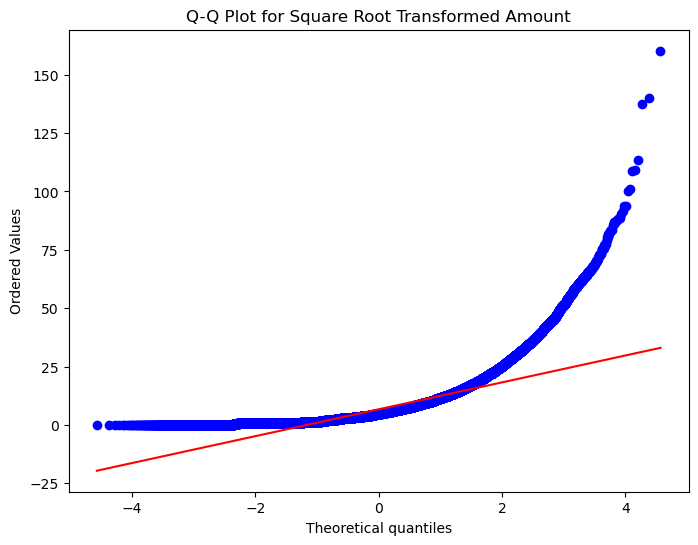

In [191]:
# Square Root Transformation for 'Amount'
df['Amount_sqrt'] = np.sqrt(df['Amount'])

# Q-Q Plot for the square root transformed 'Amount' column
plt.figure(figsize=(8, 6))
stats.probplot(df['Amount_sqrt'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Square Root Transformed Amount')
plt.show()


#### Box-Cox Transformation

In [40]:
from scipy.stats import boxcox

# Box-Cox transformation on 'Amount' (only for positive values)
df_boxcox_transformed = df.copy()

# Box-Cox can only be applied to positive values, so we apply it to 'Amount' after ensuring all values are positive
df_boxcox_transformed['Amount'], _ = boxcox(df_boxcox_transformed['Amount'] + 1)  # Adding 1 to avoid issues with 0

# Check the result of the Box-Cox transformation
print(df_boxcox_transformed[['Amount']].head())

     Amount
0  4.490035
1  1.268075
2  5.212956
3  4.337344
4  3.879280


# Exploratory Data Analysis

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


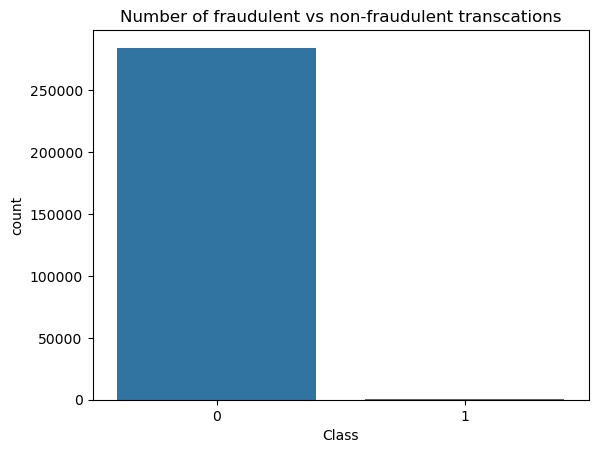

In [43]:
# Bar plot for the number of fraudulent vs non-fraudulent transcations
sns.countplot(x='Class', data=df)
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()

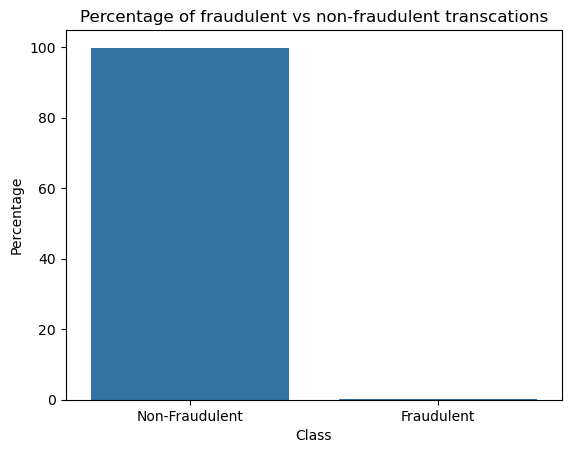

In [44]:
# Bar plot for the percentage of fraudulent vs non-fraudulent transcations
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')
plt.show()

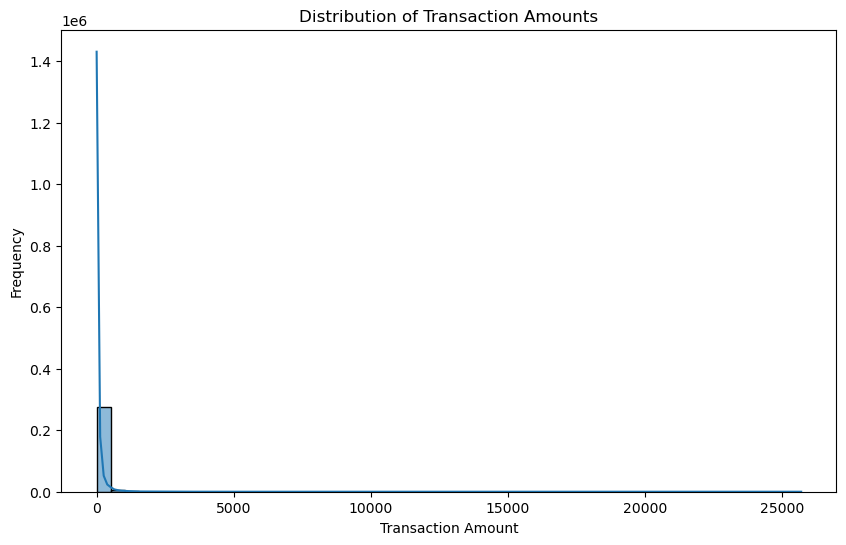

In [45]:
#Distribution of the 'Amount' column (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

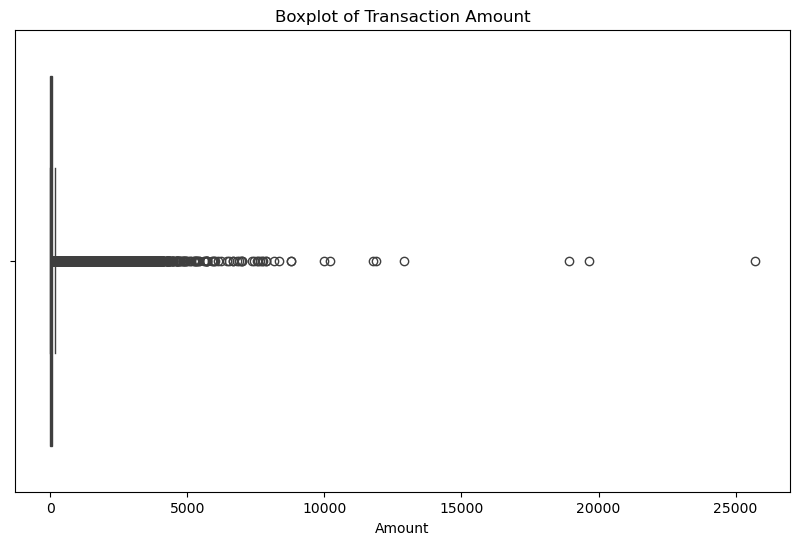

In [46]:
# Boxplot of 'Amount' column (to identify outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Amount', data=df)
plt.title('Boxplot of Transaction Amount')
plt.show()

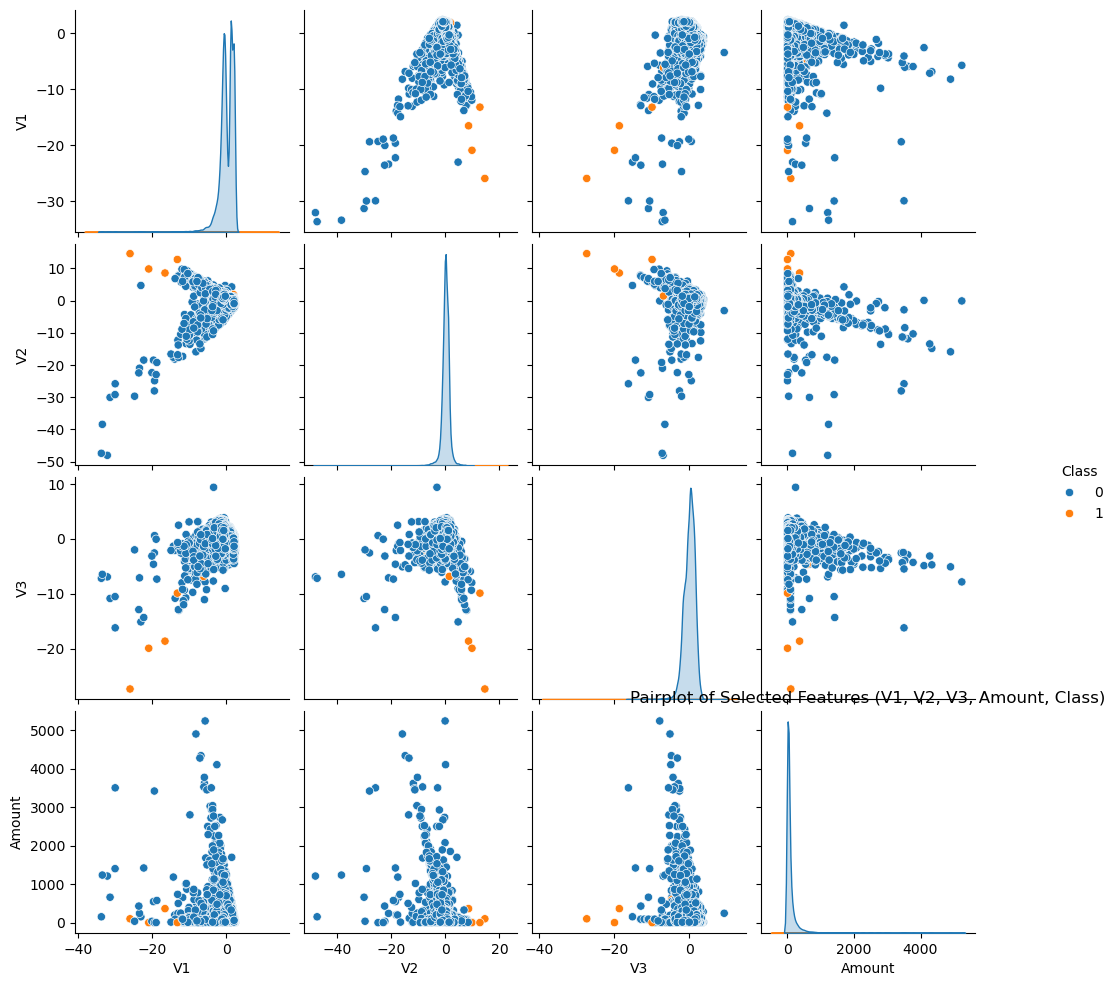

In [47]:
# Reduce the sample size to 5%
df_sampled = df.sample(frac=0.05, random_state=42)
sns.pairplot(df_sampled[['V1', 'V2', 'V3', 'Amount', 'Class']], hue='Class', diag_kind='kde')
plt.title('Pairplot of Selected Features (V1, V2, V3, Amount, Class)')
plt.show()

# Statistical Analysis

In [49]:
# Creating fraudulent dataframe
data_fraud = df[df['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]

C:\Users\shanh\AppData\Local\Temp\ipykernel_5952\3962400817.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
C:\Users\shanh\AppData\Local\Temp\ipykernel_5952\3962400817.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.dis

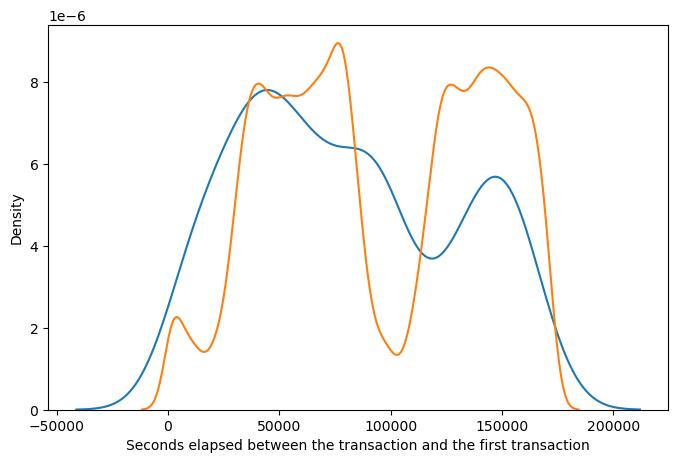

In [50]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transaction and the first transaction')
plt.show()

As there is no specific pattern for the fraudulent and non-fraudulent transctions with respect to Time.
Hence,`Time` column is dropped.

In [52]:
# Dropping the Time column
df.drop('Time', axis=1, inplace=True)

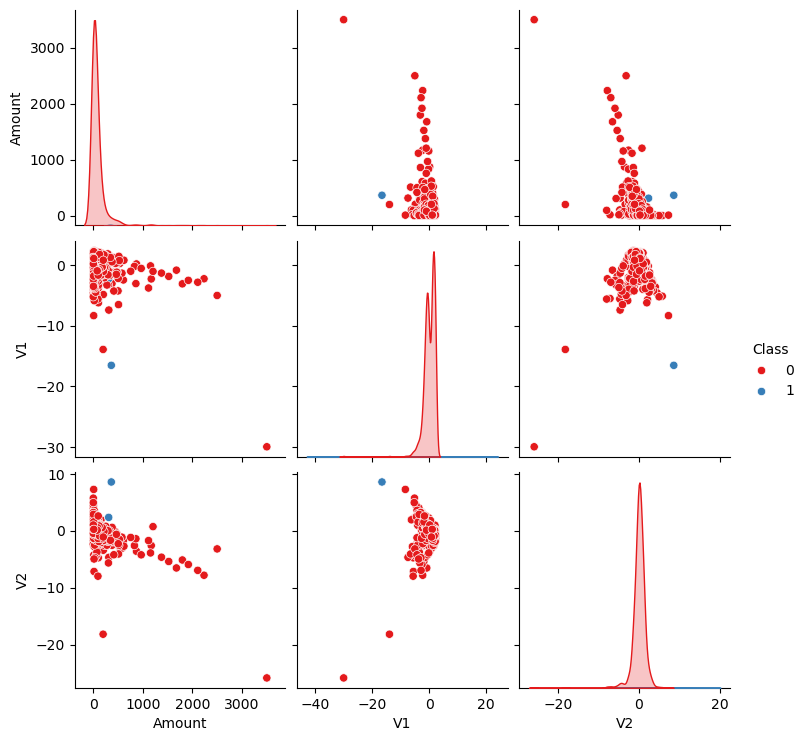

In [53]:
# Sampling the dataset to a manageable size for pair plot visualization
sampled_data = df.sample(1000, random_state=42)

# Visualizing relationships between 'Amount', 'V1', 'V2', and 'Class'
sns.pairplot(sampled_data[['Amount', 'V1', 'V2', 'Class']], hue='Class', diag_kind='kde', palette='Set1')
plt.show()

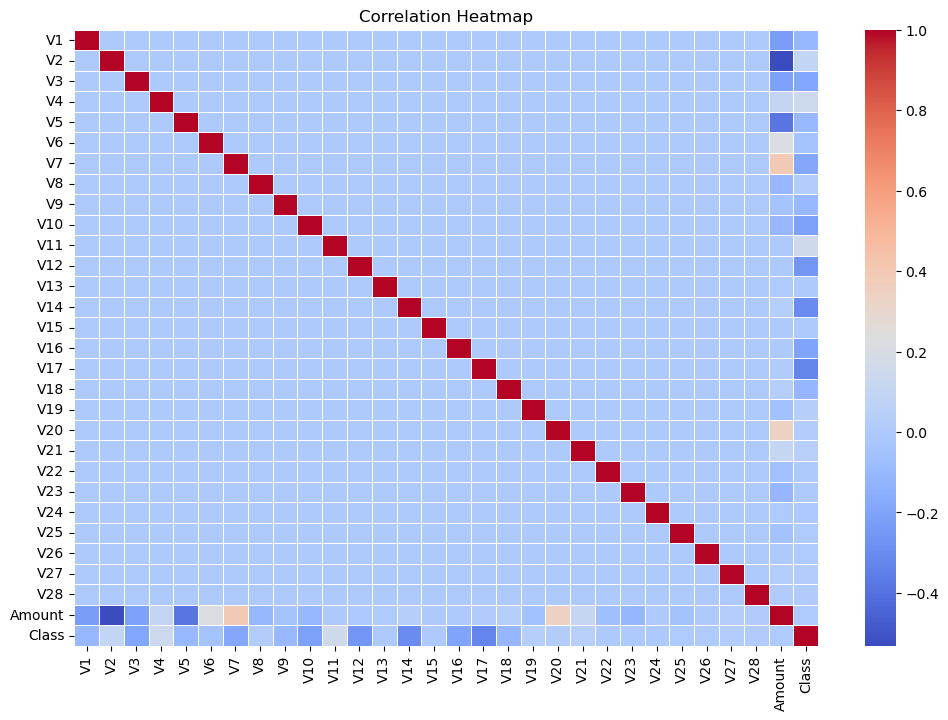

In [54]:
#Correlation heatmap (V1-V28, Amount, Class)
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\shanh\AppData\Local\Temp\ipykernel_5952\3578462442.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate = df.groupby('Amount_bins')['Class'].mean()


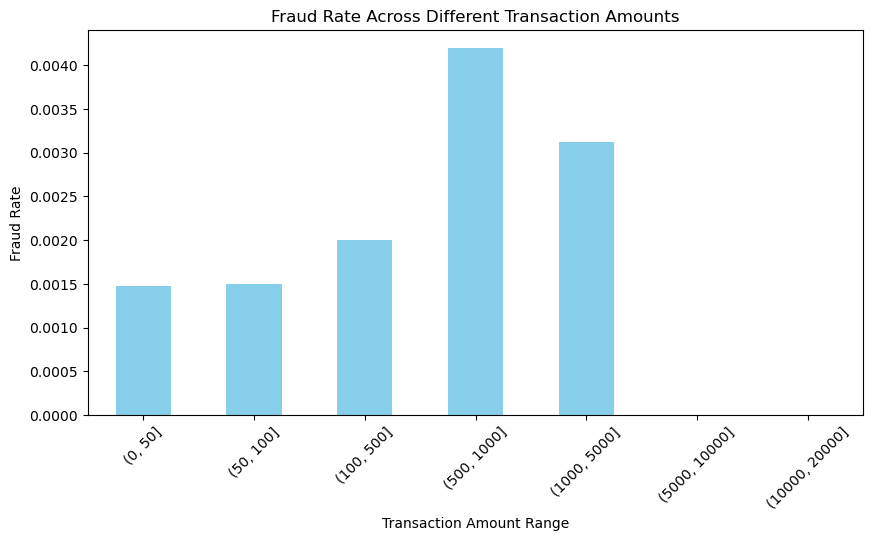

In [55]:
# Categorize 'Amount' into bins
df['Amount_bins'] = pd.cut(df['Amount'], bins=[0, 50, 100, 500, 1000, 5000, 10000, 20000])

# Calculate fraud rate within each bin
fraud_rate = df.groupby('Amount_bins')['Class'].mean()

# Plot fraud rate across different transaction amounts
plt.figure(figsize=(10, 5))
fraud_rate.plot(kind='bar', color='skyblue')
plt.title('Fraud Rate Across Different Transaction Amounts')
plt.ylabel('Fraud Rate')
plt.xlabel('Transaction Amount Range')
plt.xticks(rotation=45)
plt.show()


In [56]:
# Check unique values in 'Class' and summary statistics of 'Amount'
print(df['Class'].value_counts())
print(df['Amount'].describe())

Class
0    284315
1       492
Name: count, dtype: int64
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


In [57]:
# Check if 'Amount' and 'Class' columns exist and have data
print(df[['Amount', 'Class']].head())

   Amount  Class
0  149.62      0
1    2.69      0
2  378.66      0
3  123.50      0
4   69.99      0


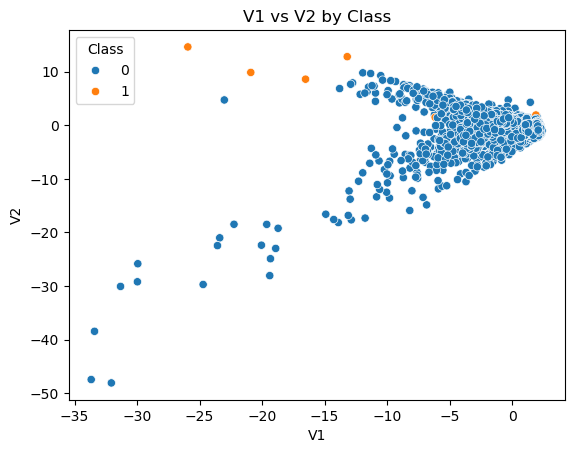

In [58]:
# Plot V1 against V2
sns.scatterplot(data=df_sampled, x='V1', y='V2', hue='Class')
plt.title('V1 vs V2 by Class')
plt.show()

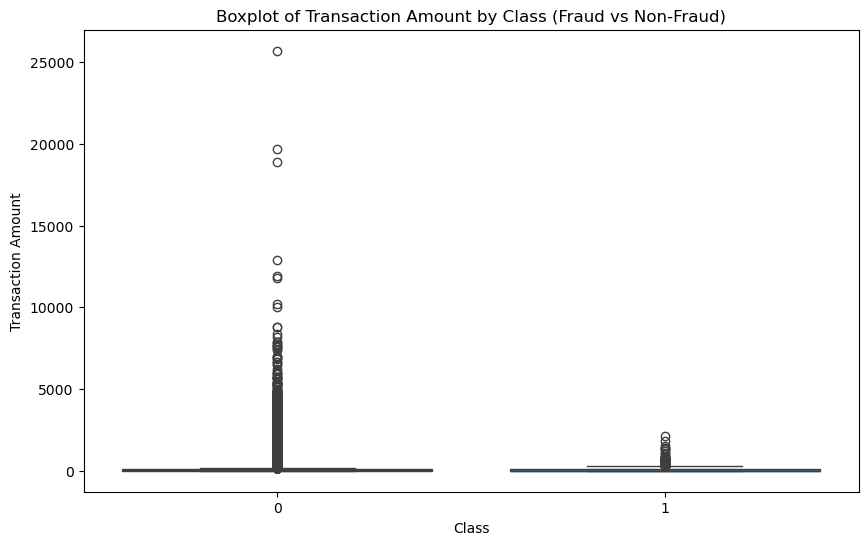

In [59]:
#Boxplot for 'Amount' by Class (Fraud vs Non-Fraud)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Boxplot of Transaction Amount by Class (Fraud vs Non-Fraud)')
plt.xlabel('Class')
plt.ylabel('Transaction Amount')
plt.show()


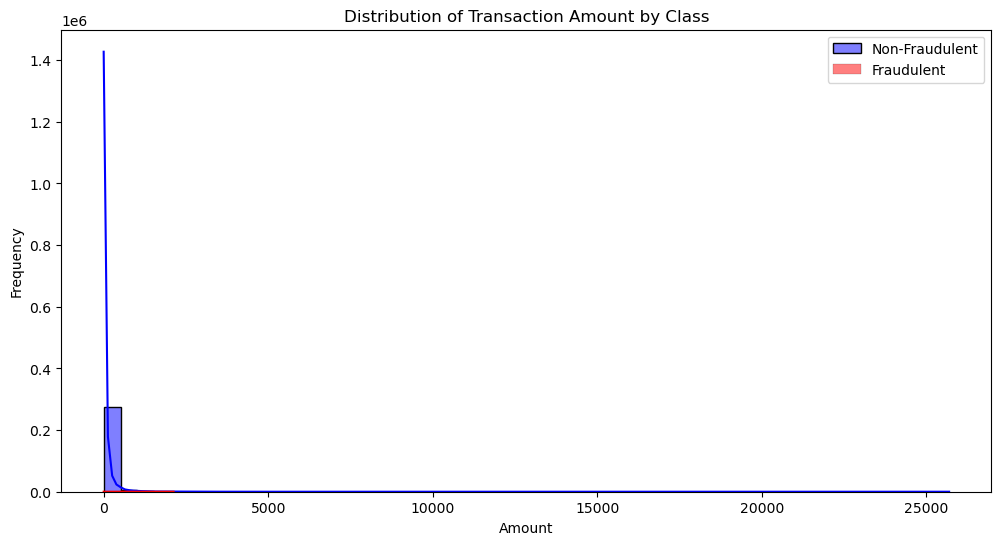

In [60]:
# Plot the distribution of 'Amount' for each class
plt.figure(figsize=(12, 6))
sns.histplot(df[df['Class'] == 0]['Amount'], bins=50, color='blue', label='Non-Fraudulent', kde=True)
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, color='red', label='Fraudulent', kde=True)
plt.title('Distribution of Transaction Amount by Class')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

C:\Users\shanh\AppData\Local\Temp\ipykernel_5952\2946557599.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0][f'V{i}'], label='Non-Fraud', shade=True)
C:\Users\shanh\AppData\Local\Temp\ipykernel_5952\2946557599.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 1][f'V{i}'], label='Fraud', shade=True)
C:\Users\shanh\AppData\Local\Temp\ipykernel_5952\2946557599.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0][f'V{i}'], label='Non-Fraud', shade=True)
C:\Users\shanh\AppData\Local\Temp\ipykernel_5952\2946557599.py:6: FutureWarning: 

`shade` is now deprecated i

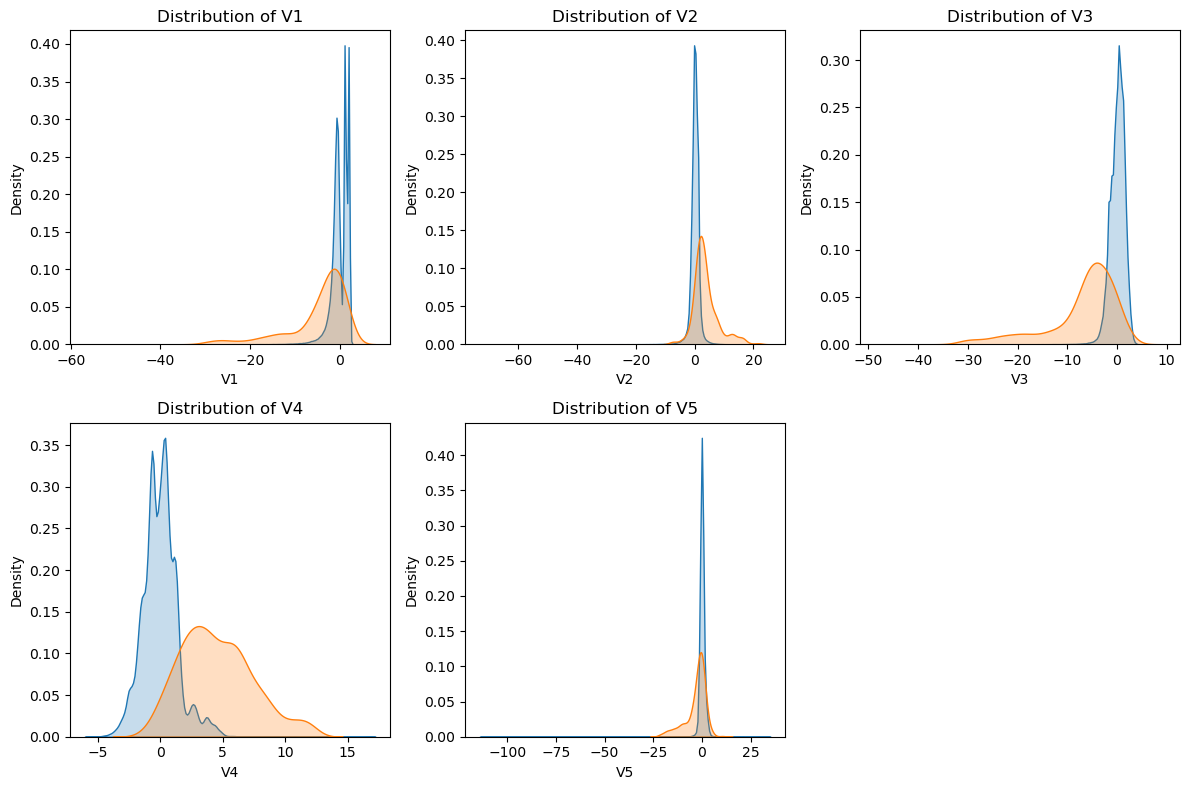

In [61]:
#Distribution of Principal Components (V1-V28) for fraud and non-fraud cases
plt.figure(figsize=(12, 8))
for i in range(1, 6):  # Visualizing V1 to V5 as examples
    plt.subplot(2, 3, i)
    sns.kdeplot(df[df['Class'] == 0][f'V{i}'], label='Non-Fraud', shade=True)
    sns.kdeplot(df[df['Class'] == 1][f'V{i}'], label='Fraud', shade=True)
    plt.title(f'Distribution of V{i}')
plt.tight_layout()
plt.show()

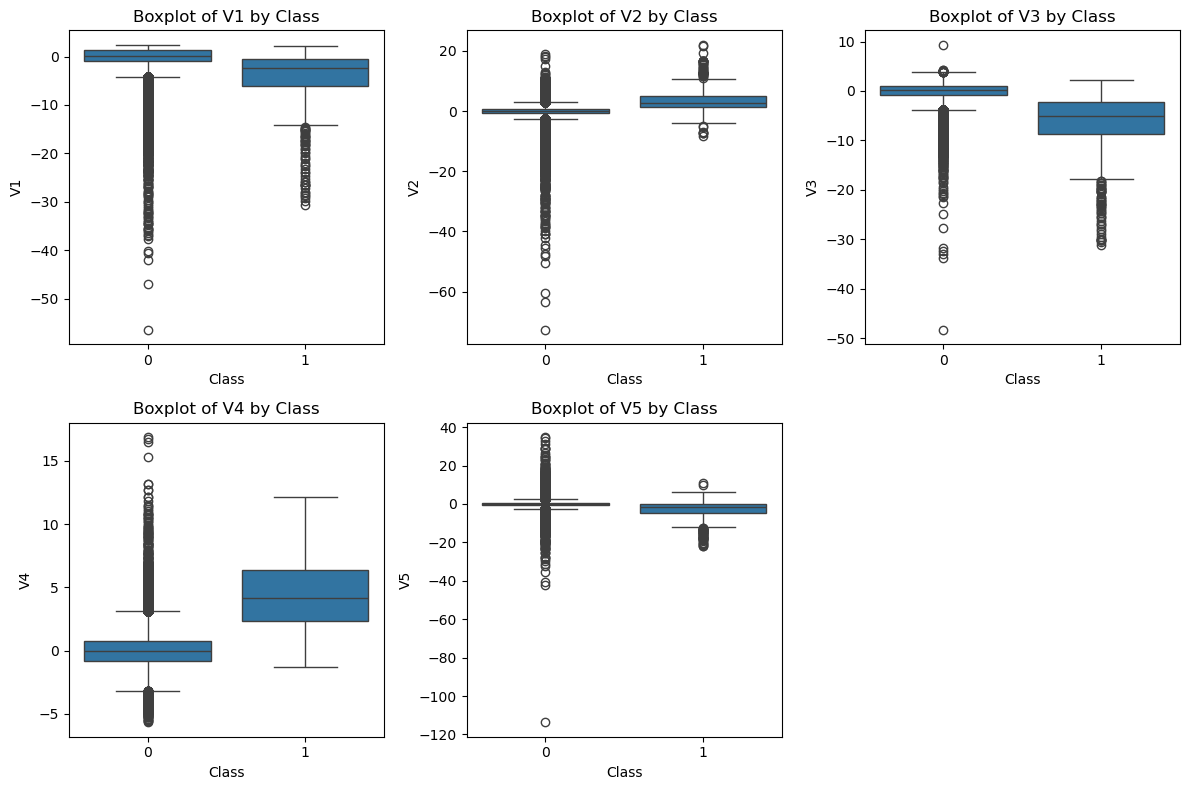

In [62]:
#Boxplot for 'V1-V5' (to check distribution by Class)
plt.figure(figsize=(12, 8))
for i in range(1, 6):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Class', y=f'V{i}', data=df)
    plt.title(f'Boxplot of V{i} by Class')
plt.tight_layout()
plt.show()

# Principal Component Analysis (PCA) for Dimensionality Reduction

In [64]:
# Check data types of each column
print(df.dtypes)

# Identify columns with non-numeric data
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns
print(f"Non-numeric columns: {non_numeric_cols}")

V1              float64
V2              float64
V3              float64
V4              float64
V5              float64
V6              float64
V7              float64
V8              float64
V9              float64
V10             float64
V11             float64
V12             float64
V13             float64
V14             float64
V15             float64
V16             float64
V17             float64
V18             float64
V19             float64
V20             float64
V21             float64
V22             float64
V23             float64
V24             float64
V25             float64
V26             float64
V27             float64
V28             float64
Amount          float64
Class             int64
Amount_bins    category
dtype: object
Non-numeric columns: Index(['Amount_bins'], dtype='object')


In [65]:
# Drop non-numeric columns (if any)
df_numeric = df.select_dtypes(include=[np.number])

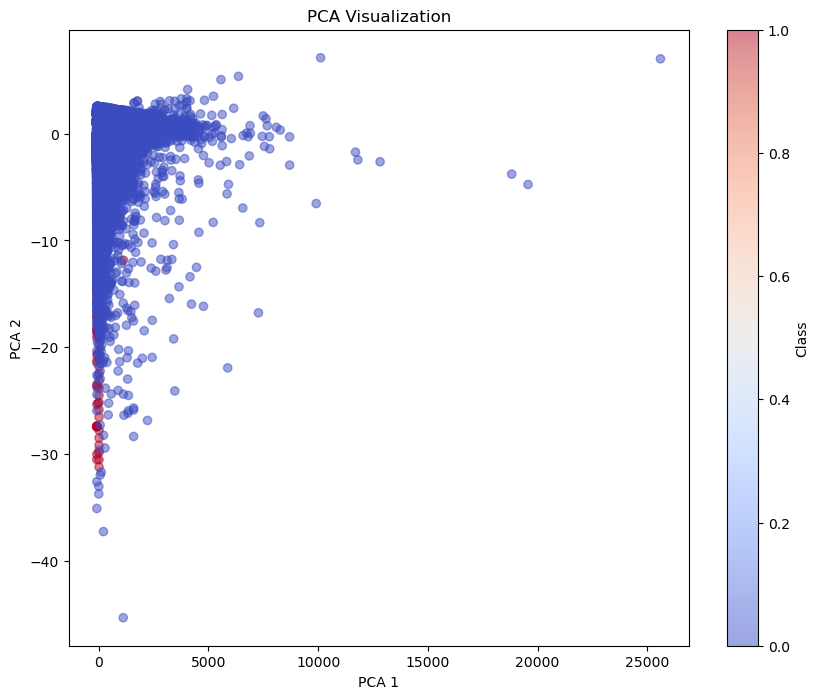

In [66]:
from sklearn.decomposition import PCA

# Separate features and target variable 
X = df_numeric.drop('Class', axis=1)
y = df_numeric['Class']

# Apply PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)

# Plot PCA results
plt.figure(figsize=(10, 8))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=y, cmap='coolwarm', alpha=0.5)
plt.title('PCA Visualization')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Class')
plt.show()


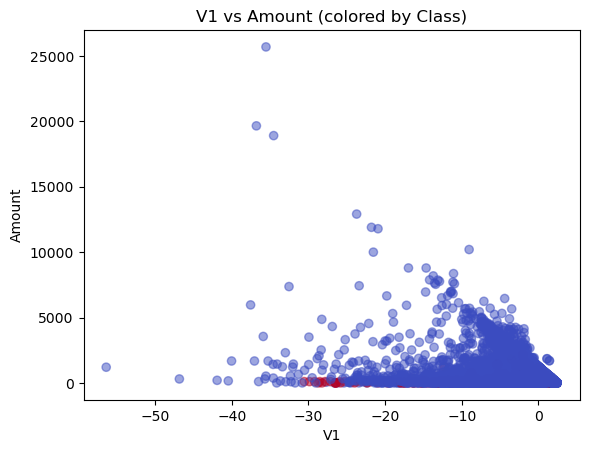

In [67]:
# Scatter plot between V1 and Amount colored by Class
plt.scatter(df['V1'], df['Amount'], c=df['Class'], cmap='coolwarm', alpha=0.5)
plt.title('V1 vs Amount (colored by Class)')
plt.xlabel('V1')
plt.ylabel('Amount')
plt.show()

# Train-Test Split

In [69]:
# Import library
from sklearn.model_selection import train_test_split

In [70]:
# Putting feature variables into X
X = df.drop(['Class'], axis=1)

In [71]:
# Putting target variable to y
y = df['Class']

In [72]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [73]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

## Feature Scaling
We need to scale only the `Amount` column as all other columns are already scaled by the PCA transformation.

In [75]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [76]:
# Instantiate the Scaler
scaler = StandardScaler()

In [77]:
# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Amount_bins
201788,2.023734,-0.429219,-0.691061,-0.201461,-0.162486,0.283718,-0.674694,0.192230,1.124319,-0.037763,0.308648,0.875063,-0.009562,0.116038,0.086537,0.628337,-0.997868,0.482547,0.576077,-0.171390,-0.195207,-0.477813,0.340513,0.059174,-0.431015,-0.297028,-0.000063,-0.046947,-0.345273,"(0, 50]"
179369,-0.145286,0.736735,0.543226,0.892662,0.350846,0.089253,0.626708,-0.049137,-0.732566,0.297692,0.519027,0.041275,-0.690783,0.647121,0.526333,-1.098558,0.511739,0.243984,3.349611,0.206709,-0.124288,-0.263560,-0.110568,-0.434224,-0.509076,0.719784,-0.006357,0.146053,-0.206439,"(0, 50]"
73138,-3.015846,-1.920606,1.229574,0.721577,1.089918,-0.195727,-0.462586,0.919341,-0.612193,-0.966197,1.106534,1.026421,-0.474229,0.641488,-0.430684,-0.631257,0.634633,-0.718062,-0.039929,0.842838,0.274911,-0.319550,0.212891,-0.268792,0.241190,0.318445,-0.100726,-0.365257,0.358043,"(100, 500]"
208679,1.851980,-1.007445,-1.499762,-0.220770,-0.568376,-1.232633,0.248573,-0.539483,-0.813368,0.785431,-0.784316,0.673626,1.428269,0.043937,-0.309507,-1.805728,-0.012118,0.377096,-0.658353,-0.196551,-0.406722,-0.899081,0.137370,0.075894,-0.244027,0.455618,-0.094066,-0.031488,0.362400,"(100, 500]"
206534,2.237844,-0.551513,-1.426515,-0.924369,-0.401734,-1.438232,-0.119942,-0.449263,-0.717258,0.851668,-0.497634,-0.445482,0.324575,0.125543,0.266588,0.802640,0.225312,-1.865494,0.621879,-0.045417,0.050447,0.125601,0.215531,-0.080485,-0.063975,-0.307176,-0.042838,-0.063872,-0.316109,"(0, 50]"


##### Scaling the test set
We don't fit scaler on the test set. We only transform the test set.

In [79]:
# Transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Amount_bins
49089,1.229452,-0.235478,-0.627166,0.419877,1.797014,4.069574,-0.896223,1.036103,0.745991,-0.147304,-0.850459,0.397845,-0.259849,-0.277065,-0.766810,-0.200946,-0.338122,0.006032,0.477431,-0.057922,-0.170060,-0.288750,-0.130270,1.025935,0.847990,-0.271476,0.060052,0.018104,-0.340485,"(0, 50]"
154704,2.016893,-0.088751,-2.989257,-0.142575,2.675427,3.332289,-0.652336,0.752811,1.962566,-1.025024,1.126976,-2.418093,1.250341,-0.056209,-0.736695,0.014783,1.890249,0.333755,-0.450398,-0.147619,-0.184153,-0.089661,0.087188,0.570679,0.101899,0.620842,-0.048958,-0.042831,-0.320859,"(0, 50]"
67247,0.535093,-1.469185,0.868279,0.385462,-1.439135,0.368118,-0.499370,0.303698,1.042073,-0.437209,1.145725,0.907573,-1.095634,-0.055080,-0.621880,-0.191066,0.311988,-0.478635,0.231159,0.437685,0.028010,-0.384708,-0.128376,0.286638,-0.136700,0.913904,-0.083364,0.052485,0.853442,"(100, 500]"
251657,2.128486,-0.117215,-1.513910,0.166456,0.359070,-0.540072,0.116023,-0.216140,0.680314,0.079977,-1.705327,-0.127579,-0.207945,0.307878,0.213491,0.163032,-0.587029,-0.561292,0.472667,-0.227278,-0.357993,-0.905085,0.223474,-1.075605,-0.188519,0.267672,-0.071733,-0.072238,-0.344410,"(0, 50]"
201903,0.558593,1.587908,-2.368767,5.124413,2.171788,-0.500419,1.059829,-0.254233,-1.959060,0.948915,-0.288169,-1.007647,0.470316,-2.771902,0.221958,0.354333,2.603189,1.092576,0.668084,0.249457,-0.035049,0.271455,0.381606,0.332001,-0.334757,0.448890,0.168585,0.004955,-0.229480,"(0, 50]"


In [80]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('creditcard.csv.zip')

In [81]:
# Importing necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
import plotly.express as px

### Data Preprocessing and Scaling

In [83]:
# Removing the 'Time' column (as it's not required)
data = data.drop('Time', axis=1)

# Separating features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for Dimensionality Reduction

In [85]:
# PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

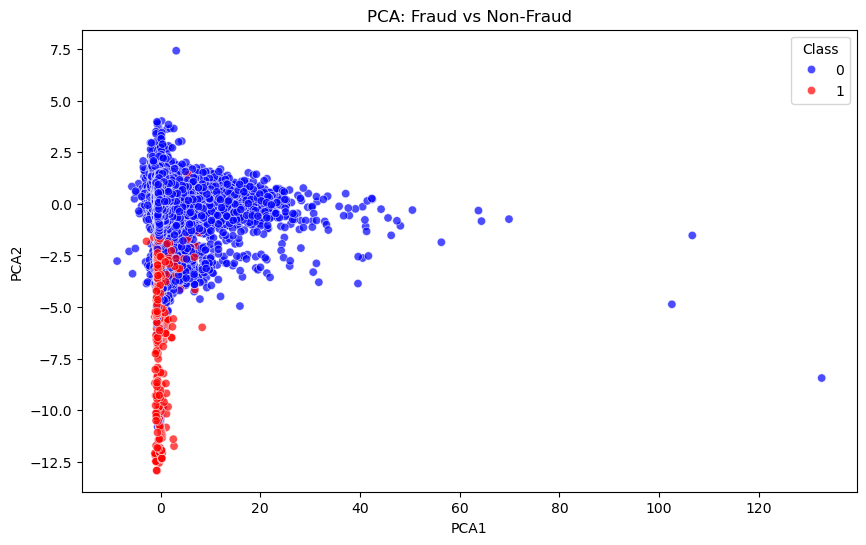

In [86]:
# Visualize PCA results
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df['Class'] = y

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Class', data=pca_df, palette={0: 'blue', 1: 'red'}, alpha=0.7)
plt.title("PCA: Fraud vs Non-Fraud")
plt.show()

# t-SNE for High Dimensional Visualization

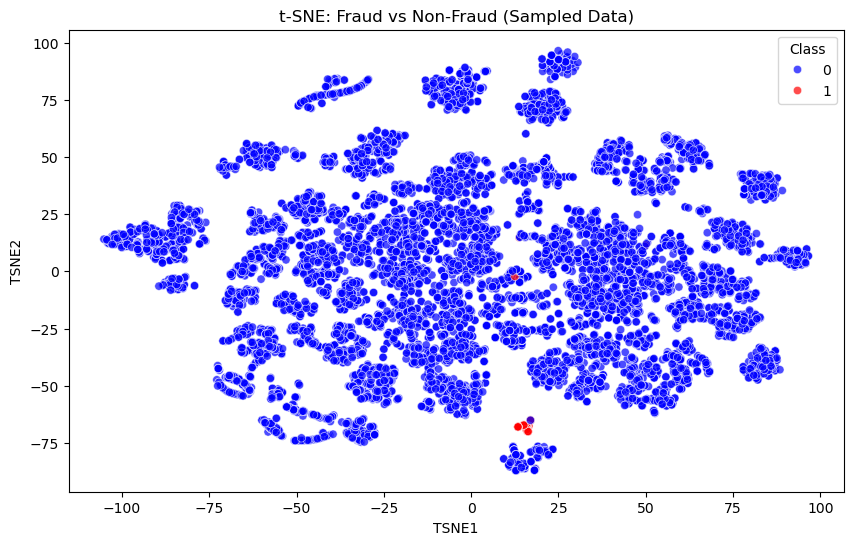

In [88]:
from sklearn.manifold import TSNE

# Reducing the dataset size for t-SNE to speed up the process
# We will take a random sample of 10,000 rows for t-SNE
sampled_data = X_scaled[:10000]
sampled_labels = y[:10000]

# Performing t-SNE with future-proof parameters
tsne = TSNE(n_components=2, init='pca', learning_rate='auto', random_state=42)
tsne_result = tsne.fit_transform(sampled_data)

# Visualizing t-SNE results
tsne_df = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])
tsne_df['Class'] = sampled_labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Class', data=tsne_df, palette={0: 'blue', 1: 'red'}, alpha=0.7)
plt.title("t-SNE: Fraud vs Non-Fraud (Sampled Data)")
plt.show()


# Clustering for Feature Interaction and Insights

In [90]:
print(pca_df.columns)

Index(['PCA1', 'PCA2', 'Class'], dtype='object')


In [91]:
# KMeans clustering (2 clusters for fraud and non-fraud)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adding cluster labels to the dataset
data['Class'] = clusters

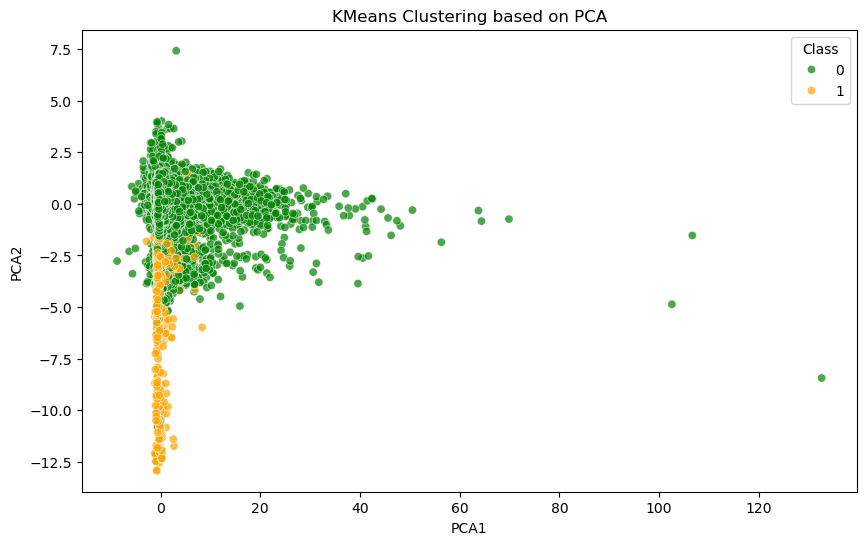

In [92]:
# Visualizing clustering results using PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Class', data=pca_df, palette={0: 'green', 1: 'orange'}, alpha=0.7)
plt.title("KMeans Clustering based on PCA")
plt.show()


# Feature Importance Analysis

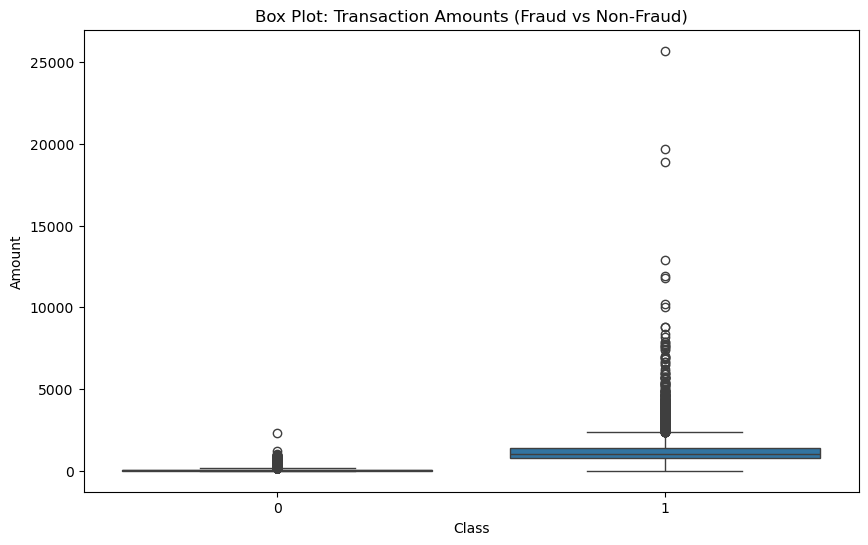

In [94]:
# Visualizing the feature importances using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=data)
plt.title("Box Plot: Transaction Amounts (Fraud vs Non-Fraud)")
plt.show()

# Pair Plot for Multivariate Insights

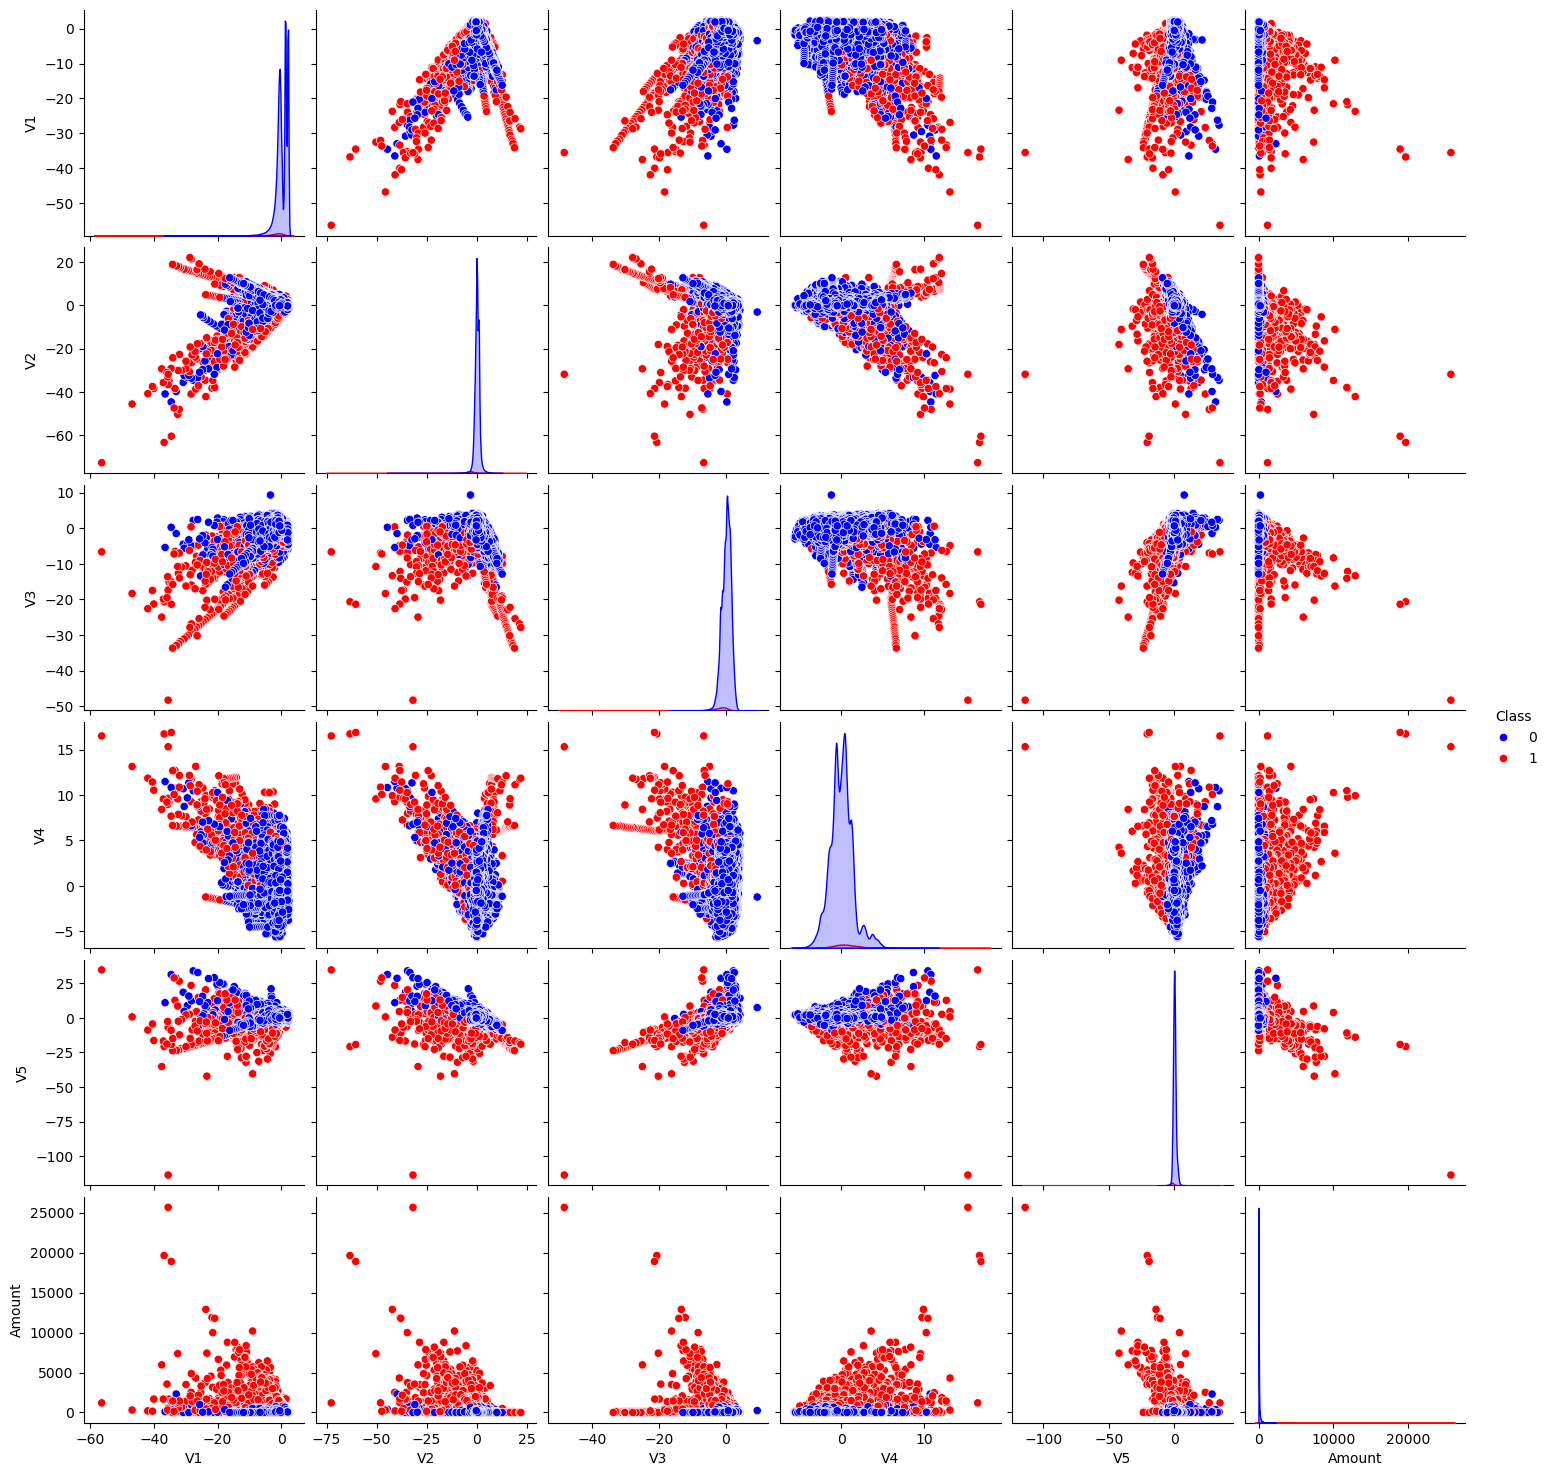

In [96]:
# Plotting a Pair Plot of selected features
selected_features = ['V1', 'V2', 'V3', 'V4', 'V5', 'Amount']
sns.pairplot(data[selected_features + ['Class']], hue='Class', palette={0: 'blue', 1: 'red'})
plt.show()

# 3D Plot using Plotly for Advanced Visualization

In [199]:
# 3D scatter plot for V1, V2, V3
#fig = px.scatter_3d(data, x='V1', y='V2', z='V3', color='Class', title="3D Scatter Plot: Fraud vs Non-Fraud", #opacity=0.6)
#fig.show()

# Distribution Assessment

### Q-Q Plot

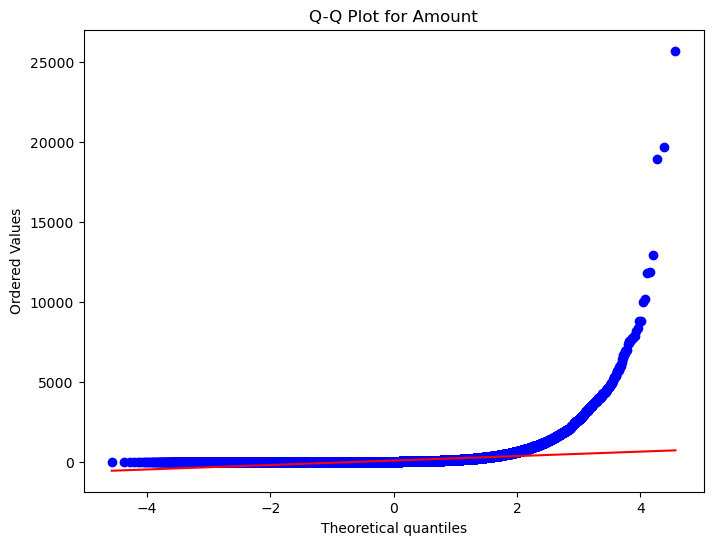

In [183]:
#The Q-Q plot will help us check if Amount is normally distributed
import scipy.stats as stats

# Q-Q Plot for the 'Amount' column
plt.figure(figsize=(8, 6))
stats.probplot(df['Amount'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Amount')
plt.show()


# Shapiro-Wilk Test

In [186]:
#The Shapiro-Wilk test will statistically test for normality in Amount
from scipy.stats import shapiro

# Shapiro-Wilk Test for the 'Amount' column
stat, p_value = shapiro(df['Amount'])
print("Shapiro-Wilk Test for Amount:")
print("Statistic:", stat, "P-value:", p_value)


Shapiro-Wilk Test for Amount:
Statistic: 0.31004461476982703 P-value: 6.536480219597055e-199


D:\APPS\Anaconda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 284807.

